In [1]:
import pandas as pd


# train = pd.read_csv("data/IMDB_sentences/IMDB_nlptown_bert_train.csv", header=None)
# test = pd.read_csv("data/IMDB_sentences/IMDB_nlptown_bert_test.csv", header=None)

In [1]:
from datasets import load_dataset

In [62]:
dataset = load_dataset("glue", "sst2")

Reusing dataset glue (/home/jjukic/.cache/huggingface/datasets/glue/sst2/1.0.0/dacbe3125aa31d7f70367a07a8a9e72a5a0bfeb5fc42e75c9db75b96da6053ad)


  0%|          | 0/3 [00:00<?, ?it/s]

In [65]:
train = dataset["train"].to_pandas().rename(columns={"sentence": "text"})[["text", "label"]]
train.to_csv("data/SST/train.csv", header=False)

In [68]:
valid = dataset["validation"].to_pandas().rename(columns={"sentence": "text"})[["text", "label"]]
valid.to_csv("data/SST/dev.csv", header=False)

In [19]:
train = train[train[0].str.split().str.len() >= 3]
test = test[test[0].str.split().str.len() >= 3]

In [21]:
train.to_csv("data/IMDB_sentences/IMDB_nlptown_bert_train.csv", header=False, index=False)
test.to_csv("data/IMDB_sentences/IMDB_nlptown_bert_test.csv", header=False, index=False)

In [2]:
import torch
import numpy
from scipy.stats import pearsonr

from viz_utils import *
from dataloaders import load_imdb, make_iterable


(train, val, test), vocab = load_imdb(
    "data/IMDB/train.csv", "data/IMDB/dev.csv", "data/IMDB/test.csv", max_len=200
)

AttributeError: 'str' object has no attribute 'convert_tokens_to_ids'

In [2]:
import torch
import numpy
from scipy.stats import pearsonr

from viz_utils import *
from dataloaders import load_trec


(train, val, test), vocab = load_trec()

Using custom data configuration default
Reusing dataset trec (/home/jjukic/.cache/huggingface/datasets/trec/default/1.1.0/751da1ab101b8d297a3d6e9c79ee9b0173ff94c4497b75677b59b61d5467a9b9)


  0%|          | 0/2 [00:00<?, ?it/s]

DatasetDict({
    train: Dataset({
        features: ['label', 'label-fine', 'text'],
        num_rows: 5452
    })
    test: Dataset({
        features: ['label', 'label-fine', 'text'],
        num_rows: 500
    })
})
Dataset({
    size: 4362,
    fields: [
        Field({
            name: 'text',
            keep_raw: True,
            is_target: False,
            vocab: Vocab({specials: ('<UNK>', '<PAD>'), eager: False, is_finalized: True, size: 8202})
        }),
        LabelField({
            name: 'label',
            keep_raw: False,
            is_target: True,
            vocab: Vocab({specials: (), eager: False, is_finalized: True, size: 6})
        })
    
    ]
})


In [9]:
df = val.to_pandas(include_raw=True)
df["new_label"] = df.label == 1
df["new_label"] = df["new_label"].astype(int)
df = df[["text_raw", "new_label"]].rename(columns={"text_raw": "text", "new_label": "label"})

In [10]:
df

,text,label
0,What are the 7 principles of learning from the...,1
1,How do you get a pointsettia to turn red ?,0
2,What California desert is dubbed High Desert ?,0
3,What are the statistics for drunken drivers in...,0
4,How do I log on to home page at Headquarters U...,0
...,...,...
1085,What chess outcome results when a player has n...,1
1086,When did the Jurassic Period end ?,0
1087,What is the normal resting heart rate of a hea...,0
1088,What singer 's theme song was When the Moon Co...,0


In [11]:
df.to_csv("data/TREC/dev.csv")

In [7]:
df = train.to_pandas(include_raw=True)

In [11]:
df = df.rename(columns={"text_raw"})

In [10]:
df = train.to_pandas(include_raw=True)
df["new_label"] = df.label == 1

In [4]:
df.to

,text,label
0,How many miles is it from NY to Austria ?,0
1,What do chefs call The Master Spice ?,1
2,Where is Los Vegas ?,0
3,Describe the Finnish music personality Salonen...,0
4,Who was Sherlock Holmes 's archenemy ?,0
...,...,...
4357,How do I keep cats out of my flower garden for...,0
4358,How many airline schools are there in the U.S. ?,0
4359,How many zeros are there in a trillion ?,0
4360,What was the backup singing group for Roy Roge...,0


In [6]:
import torch
import numpy
from scipy.stats import pearsonr

from viz_utils import *
from dataloaders import *




In [73]:
import numpy as np
from podium import Vocab, Field, LabelField, BucketIterator
from podium.datasets import TabularDataset, Dataset, ExampleFactory
from podium.datasets.hf import HFDatasetConverter
from podium.vectorizers import GloVe
from podium.datasets.impl import SST


def load_sst(tokenizer=None, max_vocab_size=20_000, max_seq_len=200):
    if tokenizer is None:
        vocab = Vocab(max_size=max_vocab_size)
        fields = {
            "text": Field(
                "text",
                numericalizer=vocab,
                include_lengths=True,
                keep_raw=True,
            ),
            "label": LabelField("label"),
        }
    else:
        # Use BERT subword tokenization
        vocab = None
        pad_index = tokenizer.convert_tokens_to_ids(tokenizer.pad_token)
        fields = {
            "text": Field(
                "text",
                tokenizer=tokenizer.tokenize,
                padding_token=pad_index,
                numericalizer=tokenizer.convert_tokens_to_ids,
                include_lengths=True,
            ),
            "label": LabelField("label"),
        }
    train, val, test = SST.get_dataset_splits(fields=fields)
    train.finalize_fields()
    return (train, val, test), vocab


In [74]:
(train, val, test), vocab = load_sst()
# train = train[train[0].str.split().str.len() >= 3]

In [13]:
from podium import Dataset

def join_datasets(d1, d2):
    examples = d1.examples + d2.examples
    dataset = Dataset(examples, d1.fields)
    return dataset

In [16]:
val

SST({
    size: 872,
    fields: [
        Field({
            name: 'text',
            keep_raw: True,
            is_target: False,
            vocab: Vocab({specials: ('<UNK>', '<PAD>'), eager: False, is_finalized: True, size: 16284})
        }),
        LabelField({
            name: 'label',
            keep_raw: False,
            is_target: True,
            vocab: Vocab({specials: (), eager: False, is_finalized: True, size: 2})
        })
    
    ]
})

In [81]:
train

SST({
    size: 6920,
    fields: [
        Field({
            name: 'text',
            keep_raw: True,
            is_target: False,
            vocab: Vocab({specials: ('<UNK>', '<PAD>'), eager: False, is_finalized: True, size: 16284})
        }),
        LabelField({
            name: 'label',
            keep_raw: False,
            is_target: True,
            vocab: Vocab({specials: (), eager: False, is_finalized: True, size: 2})
        })
    
    ]
})

In [82]:
train_df = train.to_pandas(include_raw=True)[["text_raw", "label"]]
dev_df = val.to_pandas(include_raw=True)[["text_raw", "label"]]
test_df = test.to_pandas(include_raw=True)[["text_raw", "label"]]

In [83]:
train_df = train_df[train_df["text_raw"].str.split().str.len() >= 3].reset_index()
del train_df["index"]

In [84]:
test_df = test_df[test_df["text_raw"].str.split().str.len() >= 3].reset_index()
del test_df["index"]


In [85]:
dev_df = dev_df[dev_df["text_raw"].str.split().str.len() >= 3].reset_index()
del dev_df["index"]


In [86]:
train_df = train_df.rename(columns={"text_raw": "text"})
test_df = test_df.rename(columns={"text_raw": "text"})
dev_df = dev_df.rename(columns={"text_raw": "text"})

In [87]:
train_df.to_csv("data/SST_podium/train.csv", header=False)
dev_df.to_csv("data/SST_podium/dev.csv", header=False)
test_df.to_csv("data/SST_podium/test.csv", header=False)

In [ ]:
device = torch.device("cpu")
test_iter = make_iterable(test, device, batch_size=1)
lengths = np.array([b.text[1].item() for b in test_iter])

In [75]:
experiments, meta = load_results(base_dir="results/", dataset="IMDB", model="JWA")
samplers = list(experiments.keys())
df_tr, df_agr, df_crt_train, df_crt_test = results_to_df(experiments, meta, mode="last")

In [76]:
df_crt_test["mode"] = "test"
df_crt_test

correctness  \
sampler al_iter                                                      
random  0        [5.0, 3.0, 1.0, 5.0, 5.0, 1.0, 3.0, 3.0, 3.0, ...   
        1        [5.0, 4.0, 4.0, 5.0, 5.0, 4.0, 4.0, 4.0, 2.0, ...   
        2        [5.0, 4.0, 4.0, 5.0, 5.0, 3.0, 4.0, 3.0, 1.0, ...   
        3        [4.0, 5.0, 5.0, 5.0, 5.0, 4.0, 5.0, 4.0, 0.0, ...   
        4        [5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 0.0, ...   
        5        [5.0, 5.0, 5.0, 5.0, 4.0, 4.0, 5.0, 4.0, 0.0, ...   
        6        [5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 4.0, 0.0, ...   
        7        [5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 4.0, 0.0, ...   
        8        [5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 0.0, ...   
        9        [5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 0.0, ...   
        10       [5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 4.0, 0.0, ...   
        11       [5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 0.0, ...   
        12       [5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 0.0, ...   
        13       [5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 3.0, 0.0, ...   
        14       [5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 4.0, 4.0, 0.0, ...   
        15       [5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 4.0, 4.0, 0.0, ...   
        16       [5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 2.0, 0.0, ...   

                                                        confidence  \
sampler al_iter                                                      
random  0        [0.78283894, 0.58848107, 0.42616972, 0.8304529...   
        1        [0.84998, 0.6993078, 0.65893674, 0.91358435, 0...   
        2        [0.8637884, 0.6877877, 0.7051008, 0.94550276, ...   
        3        [0.78916276, 0.8993479, 0.85253716, 0.92883694...   
        4        [0.8375348, 0.894714, 0.9135955, 0.90790576, 0...   
        5        [0.89609575, 0.89621735, 0.90910304, 0.9033942...   
        6        [0.81657904, 0.91248256, 0.9561507, 0.8539902,...   
        7        [0.8620178, 0.9067441, 0.9304037, 0.9061612, 0...   
        8        [0.86823446, 0.8439263, 0.92796814, 0.92397976...   
        9        [0.86930275, 0.9459759, 0.9834305, 0.91378677,...   
        10       [0.881827, 0.8935772, 0.97971994, 0.93271554, ...   
        11       [0.9340601, 0.8846282, 0.96369267, 0.9313241, ...   
        12       [0.87246734, 0.94593275, 0.9820895, 0.9344882,...   
        13       [0.9333574, 0.8824846, 0.98008394, 0.8832699, ...   
        14       [0.9475214, 0.8615546, 0.9767693, 0.8788087, 0...   
        15       [0.93444335, 0.9247114, 0.99047136, 0.9139802,...   
        16       [0.91954917, 0.9492261, 0.9853799, 0.8625496, ...   

                                                       variability  \
sampler al_iter                                                      
random  0        [0.17009637, 0.2580752, 0.25123364, 0.15298496...   
        1        [0.13170633, 0.25117576, 0.31623322, 0.1073726...   
        2        [0.14705713, 0.26753086, 0.29151422, 0.0617347...   
        3        [0.2032645, 0.11721138, 0.2049385, 0.07309772,...   
        4        [0.17550012, 0.11349908, 0.13063577, 0.1452678...   
        5        [0.13641648, 0.08994673, 0.17029877, 0.1062847...   
        6        [0.21104053, 0.09875934, 0.07940291, 0.1734080...   
        7        [0.13242742, 0.12119822, 0.11698113, 0.0974357...   
        8        [0.17705128, 0.1423392, 0.106700465, 0.0965236...   
        9        [0.07643037, 0.06524582, 0.029595202, 0.077918...   
        10       [0.13177201, 0.12107883, 0.03653954, 0.0928087...   
        11       [0.064061366, 0.12324003, 0.05600844, 0.103032...   
        12       [0.13323912, 0.047539033, 0.024653811, 0.06136...   
        13       [0.06353353, 0.15532187, 0.03581069, 0.1252086...   
        14       [0.049171694, 0.17564903, 0.038364924, 0.13747...   
        15       [0.08761884, 0.083593965, 0.015219989, 0.08994...   
        16       [0.09207666, 0.077664495, 0.025724407, 0.18750...   

                                                     forgetful

In [77]:
df_tr.reset_index().merge(df_agr.reset_index(), how="outer")

,experiment,al_iter,labeled,train_loss,test_accuracy,sampler,interpreter,agreement
0,0,0,1000,0.000478,0.793491,random,"(deeplift, grad-shap)",0.479056
1,0,1,2000,0.000613,0.827642,random,"(deeplift, grad-shap)",0.393933
2,0,2,3000,0.000455,0.837726,random,"(deeplift, grad-shap)",0.371958
3,0,3,4000,0.000773,0.851708,random,"(deeplift, grad-shap)",0.359864
4,0,4,5000,0.000599,0.839560,random,"(deeplift, grad-shap)",0.299011
...,...,...,...,...,...,...,...,...
80,4,12,13000,0.000635,0.851020,random,"(deeplift, grad-shap)",0.477074
81,4,13,14000,0.000748,0.870502,random,"(deeplift, grad-shap)",0.477458
82,4,14,15000,0.000832,0.864084,random,"(deeplift, grad-shap)",0.466664
83,4,15,16000,0.000704,0.866606,random,"(deeplift, grad-shap)",0.459473


In [82]:
idx = -1
correctness = df_crt_test.correctness.iloc[idx]
confidence = df_crt_test.confidence.iloc[idx]
variability = df_crt_test.variability.iloc[idx]
forgetfulness = df_crt_test.forgetfulness.iloc[idx]
threshold = df_crt_test.threshold_closeness.iloc[idx]

corrs = np.array(
    experiments["random"][0]["correlation"][0][-1][("deeplift", "grad-shap")]
)

print(f"Correctness vs. Agreement = {pearsonr(correctness, corrs)}")
print(f"Confidence vs. Agreement = {pearsonr(confidence, corrs)}")
print(f"Variability vs. Agreement = {pearsonr(variability, corrs)}")
print(f"Forgetfulness vs. Agreement = {pearsonr(forgetfulness, corrs)}")
print(f"Threshold vs. Agreement = {pearsonr(threshold, corrs)}")
print(f"Correctness vs. Threshold = {pearsonr(correctness, threshold)}")
print(f"Lengths vs. Agreement = {pearsonr(lengths, corrs)}")

Correctness vs. Agreement = (-0.056863037497474976, 0.00017131851915114254)
Confidence vs. Agreement = (-0.07549197804580023, 5.970524657390969e-07)
Variability vs. Agreement = (0.11780471234503823, 5.888150828564244e-15)
Forgetfulness vs. Agreement = (0.025358300784053975, 0.09397712630432788)
Threshold vs. Agreement = (0.1180455682624643, 5.182822688013203e-15)
Correctness vs. Threshold = (-0.5750283990741647, 0.0)
Lengths vs. Agreement = (-0.01633789837767084, 0.2806188749786038)


In [79]:
new_conf = np.where(confidence < 0.6, 1 - confidence, confidence)
new_conf

array([0.91954917, 0.9492261 , 0.9853799 , ..., 0.99810135, 0.89542246,
       0.85745126], dtype=float32)

In [156]:
print(f"Confidence vs. Agreement = {pearsonr(lengths, variability)}")

Confidence vs. Agreement = (0.012263238063950709, 0.41804241718105667)


In [170]:
inds = np.random.choice(range(len(test)), 300)

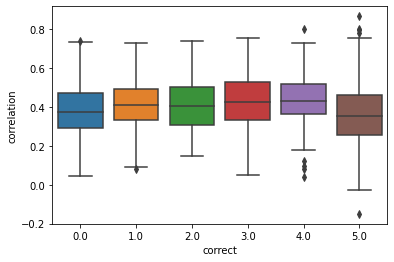

In [176]:
import pandas as pd
import seaborn as sns

data = pd.DataFrame({"correct": correctness, "correlation": corrs})
ax = sns.boxplot(x="correct", y="correlation", data=data)

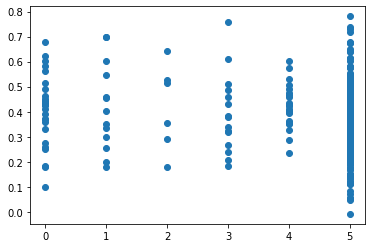

In [171]:
plt.scatter(correctness[inds], corrs[inds])

In [117]:
X = np.stack([variability, confidence]).T
X

array([[0.00983451, 0.95767915],
       [0.10356518, 0.84107435],
       [0.32318285, 0.7168516 ],
       ...,
       [0.01792088, 0.9850588 ],
       [0.13717234, 0.8051011 ],
       [0.06044536, 0.589533  ]], dtype=float32)

In [119]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(X, correctness)
# correct = df_crt_test.variability.iloc[-1]
# mms = MinMaxScaler()
# scaled = mms.fit_transform(correct.reshape(-1, 1)).squeeze()
# pearsonr(scaled, corrs)

LinearRegression()

In [122]:
lr.intercept_
lr.coef_

array([1.5116051, 6.272514 ], dtype=float32)

In [124]:
pred = lr.predict(X)

In [127]:
pearsonr(pred, correctness)

(0.9438331875364465, 0.0)

In [56]:
inds = scaled < 0.005

In [64]:
(idxs,) = np.where(inds)

In [119]:
pearsonr(lengths[inds], corrs[inds])

(-0.042872524972765225, 0.09863840166390044)

In [75]:
b = ~(scaled >= 0.2) * (scaled <= 0.8)
b = b.astype(np.int32)

In [76]:
b.sum()

512

In [85]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LinearRegression

degree = 2
polyreg = make_pipeline(PolynomialFeatures(degree), LinearRegression())
polyreg.fit(scaled.reshape(-1, 1), corrs)

Pipeline(steps=[('polynomialfeatures', PolynomialFeatures()),
                ('linearregression', LinearRegression())])

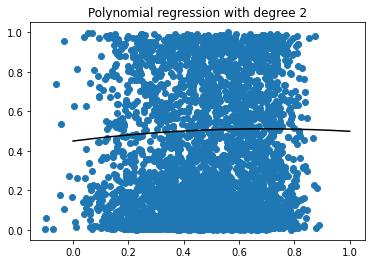

In [86]:
import matplotlib.pyplot as plt

X_seq = np.linspace(scaled.min(), scaled.max(), 300).reshape(-1, 1)
plt.figure()
plt.scatter(, scaled)
plt.plot(X_seq, polyreg.predict(X_seq), color="black")
plt.title("Polynomial regression with degree " + str(degree))
plt.show()

In [ ]:
plt.plot()

In [90]:
import sklearn

sklearn.metrics.r2_score(corrs, polyreg.predict(scaled.reshape(-1, 1)))

0.1261654099626146

In [ ]:
PolynomialFeatures

In [43]:
model = np.poly1d(np.polyfit(corrs, scaled, 2))

In [44]:
trans = model(scaled)
trans

array([0.81753996, 0.81753996, 0.78690508, ..., 0.81753996, 0.81753996,
       0.81753996])

In [84]:
pearsonr(scaled, corrs)

(0.264291155282007, 1.2266145001017638e-70)

In [38]:
slope, intercept, r_value, p_value, std_err

(-0.034899618735527896,
 0.4035899772904024,
 -0.0826515983704906,
 4.572561310998237e-08,
 0.006372177980030901)

In [25]:
len(scaled)

4363

In [16]:
corrs = np.array(
    experiments["random"][0]["correlation"][0][-1][("deeplift", "grad-shap")]
)

In [18]:
corrs.shape

(4363,)

In [45]:
inds = []
for i, l in enumerate(scaled):
    if l < 0.01:
        inds.append(i)

In [77]:
test[idxs][4]

Example({
    text: (None, ['phoned', 'work', 'sick', 'watched', 'this', 'in', 'bed', 'and', 'it', 'was', 'so', 'awful', 'i', 'would', 'have', 'went', 'back', 'to', 'work', 'if', 'i', 'could', 'have', 'gotten', 'out', 'of', 'bed', 'the', 'dog', 'ran', 'off', 'with', 'the', 'remote', 'so', 'i', 'was', 'stuck', 'br', 'br', "i'm", 'positive', 'hammer', 'was', 'grooming', 'the', 'eldest', 'daughter', 'to', 'become', 'his', 'br', 'br', 'horrendous', 'to', 'watch', 'made', 'me', 'vomit', 'more', 'than', 'what', 'i', 'was', 'doing', 'anyway', 'so', 'there', 'you', 'have', 'it', 'this', 'would', 'be', 'the', 'film', 'that', 'they', 'play', 'in', 'the', 'waiting', 'room', 'of', 'hell', 'before', 'you', 'go', 'in', 'or', 'maybe', 'your', 'stuck', 'in', 'the', 'film', 'for', 'all', 'eternity', 'with', 'the', 'hart', 'kids', 'just', 'remember', 'to', 'take', 'a', 'gun', 'with', 'you']),
    label: (None, '0')
})